<a href="https://colab.research.google.com/github/KuroiYoshiko/Traffic-Light-Detection/blob/main/analiza_datasetow_magisterka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving training-annotations-day.csv to training-annotations-day.csv


# dtld

In [ ]:
import re

file_path = "/content/DTLD_test.json"

with open(file_path, "r") as file:
    content = file.read()

state = len(re.findall(r'"state":', content))
green = len(re.findall(r'"state": "green"', content))
off = len(re.findall(r'"state": "off"', content))
red = len(re.findall(r'"state": "red"', content))
yellow = len(re.findall(r'"state": "yellow"', content))
red_yellow = len(re.findall(r'"state": "red_yellow"', content))
unknown = len(re.findall(r'"state": "unknown"', content))

print("state: ", state)
print("green: ", green)
print("off: ", off)
print("red: ", red)
print("yellow: ", yellow)
print("red_yellow: ", red_yellow)
print("unknown: ", unknown)

suma = green+off+red+yellow+red_yellow+unknown

print("do porownania, lacznie: ", suma)
print("czyli odejmujac: ", (state-suma))


# **Analiza**

In [ ]:
dataset = pd.read_csv("training-annotations-day.csv", index_col=False)
dataset.head()

,Filename,Width,Height,Class,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
0,dayClip1--00000.jpg,1280,960,go,698,333,710,358
1,dayClip1--00000.jpg,1280,960,go,846,391,858,411
2,dayClip1--00001.jpg,1280,960,go,698,337,710,357
3,dayClip1--00001.jpg,1280,960,go,847,390,859,410
4,dayClip1--00002.jpg,1280,960,go,698,331,710,356


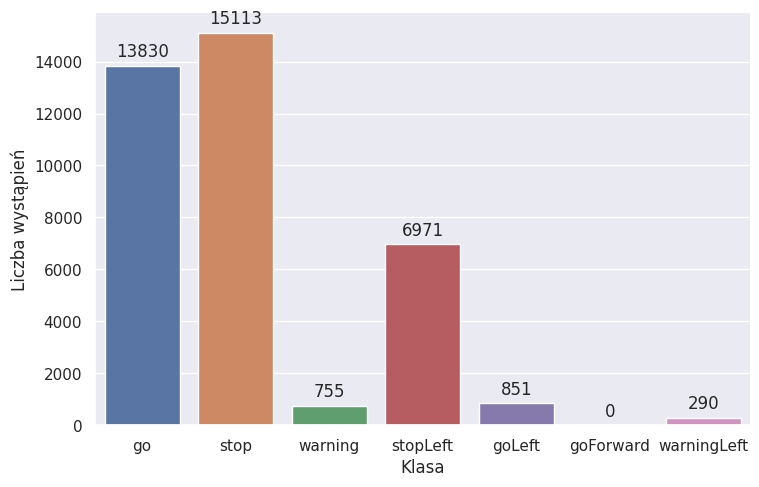

In [ ]:
from numpy.core.fromnumeric import sort
sort_order = ['go', 'stop', 'warning', 'stopLeft', 'goLeft', 'goForward', 'warningLeft']
#sort_order = ['stop', 'go', 'ambiguous', 'warning']

g = sns.catplot(x='Class',kind='count',data=dataset, order=sort_order)
#g = sns.catplot(x='Klasa',kind='count',data=lisa_valDayAnnotations)

g.set_xlabels(label="Klasa")
g.set_ylabels(label="Liczba wystąpień")
sns.set(font_scale=1)

g.fig.set_size_inches(9,5)
for p in g.ax.patches:
    g.ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# **Bosch**

In [ ]:
# czyszczenie danych bosch
dataset_filtered = dataset[dataset['Klasa'].str.contains("- {label: ")].dropna()
dataset_filtered['Klasa'] = dataset_filtered['Klasa'].str.replace(r'- {label: (\w+)', r'\1')
dataset_filtered['Klasa'] = dataset_filtered['Klasa'].str.replace(r'- {label: \'(\w+)\'', r'\1')
dataset_filtered.head()
dataset_filtered.value_counts()

<ipython-input-68-6ee68441fe80>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_filtered['Klasa'] = dataset_filtered['Klasa'].str.replace(r'- {label: (\w+)', r'\1')
<ipython-input-68-6ee68441fe80>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_filtered['Klasa'] = dataset_filtered['Klasa'].str.replace(r'- {label: \'(\w+)\'', r'\1')


Klasa   
  Green     7569
  Red       5321
  off        442
  Yellow     154
dtype: int64

In [ ]:
dataset_filtered = dataset[dataset['Klasa'].str.contains("- {label: ")].dropna()
dataset_filtered['Klasa'] = dataset_filtered['Klasa'].str.extract(r'- {label: (\w+),')
dataset_filtered.head()
#dataset_filtered.value_counts()

,Klasa
1,NaN
4,NaN
8,NaN
12,NaN
16,NaN


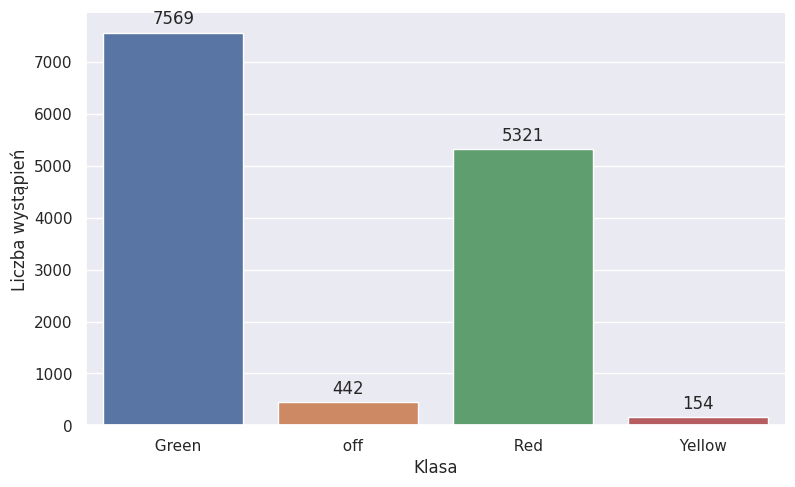

In [ ]:
from numpy.core.fromnumeric import sort

g = sns.catplot(x='Klasa',kind='count',data=dataset_filtered)

g.set_xlabels(label="Klasa")
g.set_ylabels(label="Liczba wystąpień")
sns.set(font_scale=1)
#g.set_xticklabels(rotation=45)

#g.fig.set_size_inches(12,5)
g.fig.set_size_inches(9,5)
for p in g.ax.patches:
    g.ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
dataset_filtered.value_counts()

Klasa             
Green                 5207
Red                   3057
RedLeft               1092
Yellow                 444
GreenLeft              178
GreenStraight           20
GreenRight              13
RedStraight              9
RedRight                 5
GreenStraightRight       3
GreenStraightLeft        1
RedStraightLeft          1
dtype: int64

In [ ]:
import pandas as pd

# Wypełnienie DataFrame
w1 = 'green'
w2 = 'off'
w3 = 'red'
w4 = 'yellow'
w5 = 'red_yellow'
w6 = 'unknown'

w1_il = green
w2_il = off
w3_il = red
w4_il = yellow
w5_il = red_yellow
w6_il = unknown

df_w1 = pd.DataFrame(columns=['Klasa'])
df_w2 = pd.DataFrame(columns=['Klasa'])
df_w3 = pd.DataFrame(columns=['Klasa'])
df_w4 = pd.DataFrame(columns=['Klasa'])
df_w5 = pd.DataFrame(columns=['Klasa'])
df_w6 = pd.DataFrame(columns=['Klasa'])

df_w1['Klasa'] = [w1] * w1_il
df_w2['Klasa'] = [w2] * w2_il
df_w3['Klasa'] = [w3] * w3_il
df_w4['Klasa'] = [w4] * w4_il
df_w5['Klasa'] = [w5] * w5_il
df_w6['Klasa'] = [w6] * w6_il

df_w1 = df_w1.append(df_w2, ignore_index=True)
df_w1 = df_w1.append(df_w3, ignore_index=True)
df_w1 = df_w1.append(df_w4, ignore_index=True)
df_w1 = df_w1.append(df_w5, ignore_index=True)
df_w1 = df_w1.append(df_w6, ignore_index=True)


# Wyświetlenie DataFrame
print(df_w1)

         Klasa
0        green
1        green
2        green
3        green
4        green
...        ...
91977  unknown
91978  unknown
91979  unknown
91980  unknown
91981  unknown

[91982 rows x 1 columns]


<ipython-input-56-5a38bdc76268>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_w1 = df_w1.append(df_w2, ignore_index=True)
<ipython-input-56-5a38bdc76268>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_w1 = df_w1.append(df_w3, ignore_index=True)
<ipython-input-56-5a38bdc76268>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_w1 = df_w1.append(df_w4, ignore_index=True)
<ipython-input-56-5a38bdc76268>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_w1 = df_w1.append(df_w5, ignore_index=True)
<ipython-input-56-5a38bdc76268>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

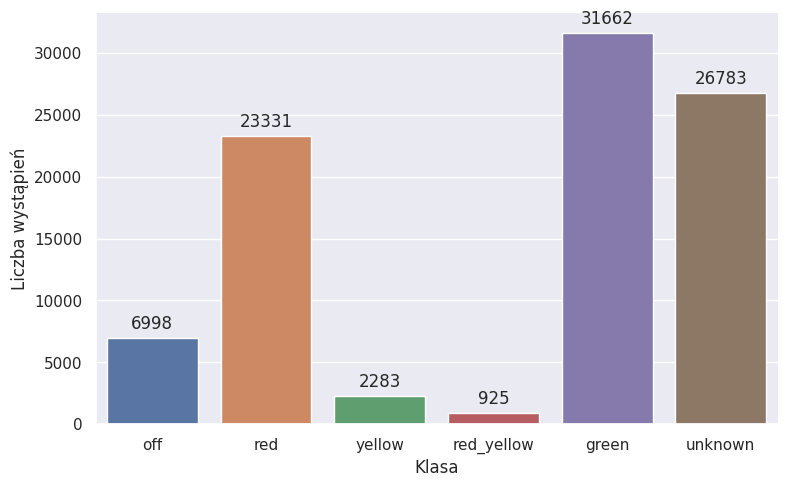

In [ ]:
from numpy.core.fromnumeric import sort
sort_order = ['off', 'red', 'yellow', 'red_yellow', 'green', 'unknown']

g = sns.catplot(x='Klasa',kind='count',data=df_w1, order=sort_order)

g.set_xlabels(label="Klasa")
g.set_ylabels(label="Liczba wystąpień")
sns.set(font_scale=1)

g.fig.set_size_inches(9,5)
for p in g.ax.patches:
    g.ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
import cv2
from matplotlib import pyplot as plt


# Wczytaj obraz TIFF
tiff_image = cv2.imread('/content/DE_BBBR667_2015-04-17_10-52-04-636522_k0.tiff', cv2.IMREAD_COLOR)

# Wyświetl obraz
plt.imshow(tiff_image)
plt.axis('off')  # Wyłącz osie
plt.show()


In [ ]:
from PIL import Image
from PIL import ImageEnhance
obraz_tiff = Image.open(image_path)
obraz_rgb = obraz_tiff.convert('RGB')

# Stwórz obiekt do regulacji jasności
enhancer = ImageEnhance.Brightness(obraz_rgb)

# Zmień jasność obrazu (0.5 to wartość przykładowa, można dostosować)
obraz_rgb_jasniejszy = enhancer.enhance(0.5)

obraz_rgb_jasniejszy.show()